<a href="https://colab.research.google.com/github/Aldistwn29/Data_analysis/blob/main/Chort_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


# Load Data
data = pd.read_csv('data.csv', encoding='ISO-8859-1')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Reformat Timestamp

In [ ]:
# import dateutil
# from datetime import datetime as dt
# from pytz import utc

# data['datetime'] = data['InvoiceDate'].apply(lambda x: dateutil.parser.parse(x).timestamp())
# data['month'] = data['datetime'].apply(lambda x : dt.fromtimestamp(x).month)
# data['year'] = data['datetime'].apply(lambda x: dt.fromtimestamp(x).year)
# data.head()

In [ ]:
# mengonversi tipe data menjadi tipe data time
data['datetime'] = pd.to_datetime(data['InvoiceDate'], errors='coerce')
data['month'] = data['datetime'].dt.month
data['year'] = data['datetime'].dt.year
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,datetime,month,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,12,2010
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,12,2010


# Membuat Chort

In [ ]:
# AUG 2010 menajadi 201008

data['cohort'] = data.apply(lambda row: (row['year'] * 100) + (row['month']), axis=1)

# menggroup data
cohorts = data.groupby('CustomerID')['cohort'].min().reset_index()
cohorts.columns = ['CustomerID', 'frist_cohort']
data = data.merge(cohorts, on='CustomerID', how='left')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,datetime,month,year,cohort,frist_cohort
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,12,2010,201012,201012.0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,12,2010,201012,201012.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,12,2010,201012,201012.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,12,2010,201012,201012.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,12,2010,201012,201012.0


# Membuat header

In [ ]:
headers = data['cohort'].value_counts().reset_index()
headers.columns = ['Chorts', 'Count']

headers.head()

headers = headers.sort_values(['Chorts'])['Chorts'].to_list()
headers

[201012,
 201101,
 201102,
 201103,
 201104,
 201105,
 201106,
 201107,
 201108,
 201109,
 201110,
 201111,
 201112]

# Pivot Table

In [ ]:
data.dropna(inplace=True)

In [ ]:
data['cohort_distance'] = data.apply(lambda row: (headers.index(row['cohort']) - headers.index(row['frist_cohort'])) if (row['frist_cohort'] != 0 and row['cohort'] != 0) else np.nan, axis=1)

In [ ]:
cohort_pivot = pd.pivot_table(data, index='frist_cohort', columns='cohort_distance', values='CustomerID', aggfunc=pd.Series.nunique)
cohort_pivot

cohort_distance,0,1,2,3,4,5,6,7,8,9,10,11,12
frist_cohort,,,,,,,,,,,,,
201012.0,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
201101.0,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
201102.0,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
201103.0,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
201104.0,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
201105.0,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
201106.0,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
201107.0,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201108.0,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cohort_pivot = cohort_pivot.div(cohort_pivot[0], axis=0)
cohort_pivot

cohort_distance,0,1,2,3,4,5,6,7,8,9,10,11,12
frist_cohort,,,,,,,,,,,,,
201012.0,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
201101.0,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
201102.0,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
201103.0,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
201104.0,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
201105.0,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
201106.0,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
201107.0,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201108.0,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Visualisasi

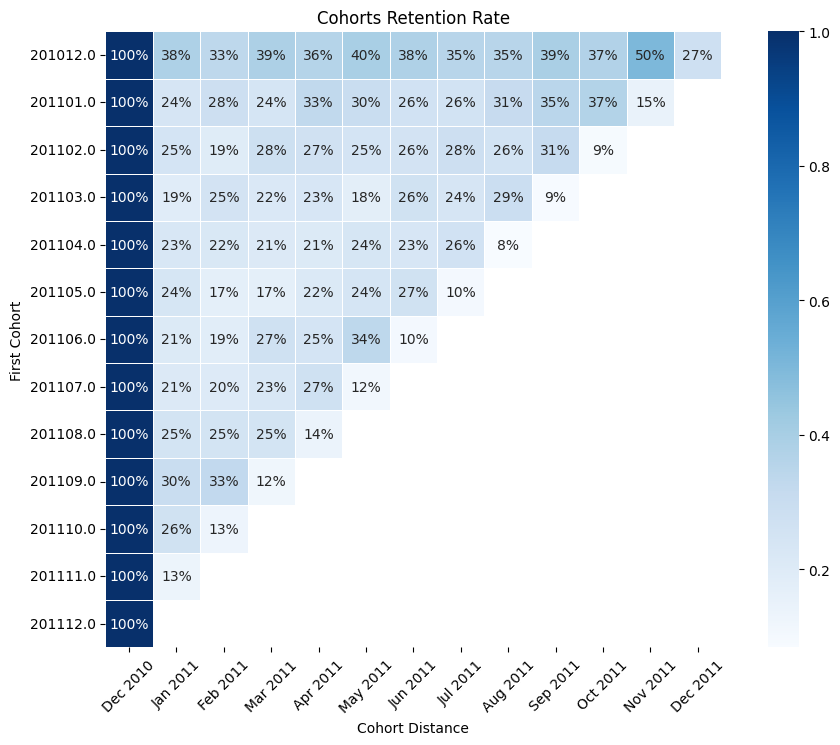

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ukuran dan inisialisasi figure
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)

# Membuat visualisasi dengan heatmap
sns.heatmap(cohort_pivot, annot=True, fmt='.0%', mask=cohort_pivot.isnull(), ax=ax, square=True, linewidths=.5, cmap='Blues')

# Menambahkan label dan judul
plt.title('Cohorts Retention Rate')
plt.xlabel('Cohort Distance')
plt.ylabel('First Cohort')

# Mengatur label sumbu x dengan nama bulan atau tahun-bulan
months = ['Dec 2010', 'Jan 2011', 'Feb 2011', 'Mar 2011', 'Apr 2011', 'May 2011',
          'Jun 2011', 'Jul 2011', 'Aug 2011', 'Sep 2011', 'Oct 2011', 'Nov 2011', 'Dec 2011']
ax.set_xticklabels(months, rotation=45)
plt.show()